In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [58]:
# Fiducial Values
I = 25
B = 4
r0 = 3

#model
def Gal(r, I, r0, B):
  return I*np.exp(-r/r0) + B
#derivatives
def dGaldI(r, r0):
  return np.exp(-r/r0)
def dGaldr0(r, I, r0):
  return I*np.exp(-r/r0)*r*r0**(-2)
def dGaldb(): #for completenes!
  return 1



In [59]:
#meassurement points
rvals = np.asarray([0, r0, 2*r0])
sigmavals = np.sqrt(Gal(rvals, I, r0, B))

In [60]:
npar = 3

F = np.zeros([npar,npar])
for r, sigma in zip(rvals, sigmavals):
  for i in range(npar):
    if i==0:
      dfdpi = dGaldI(r,r0)
    elif i==1:
      dfdpi = dGaldr0(r, I, r0)
    else:
      dfdpi = 1
    for j in range(npar):
      if j==0:
        dfdpj = dGaldI(r,r0)
      elif j==1:
        dfdpj = dGaldr0(r, I, r0)
      else:
        dfdpj = 1
      F[i,j] += (1/sigma**2)*dfdpi*dfdpj

print(F)
print(np.linalg.inv(F))

[[0.04721843 0.12680274 0.08068849]
 [0.12680274 1.40122519 0.5377954 ]
 [0.08068849 0.5377954  0.24569692]]
[[103.67152913  23.04733775 -84.49373886]
 [ 23.04733775   9.58661067 -28.55261669]
 [-84.49373886 -28.55261669  94.31594859]]


[[103.67153225  23.04733889 -84.49374213]
 [ 23.04733889   9.58661108 -28.55261788]
 [-84.49374213 -28.55261788  94.315952  ]]
[[103.67152913  23.04733775 -84.49373886]
 [ 23.04733775   9.58661067 -28.55261669]
 [-84.49373886 -28.55261669  94.31594859]]


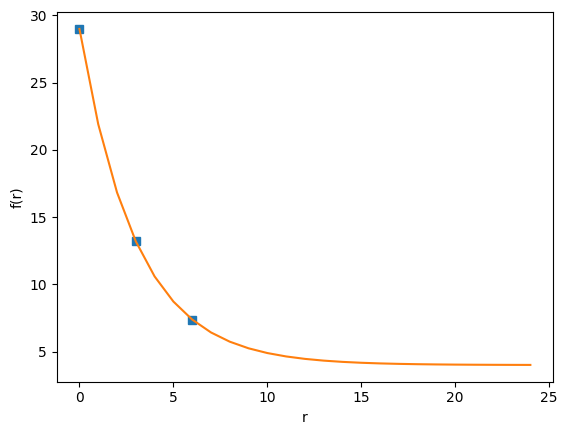

In [62]:
#comparing with scipy optimize
rdata = rvals
ydata = Gal(rdata, I, r0, B)
rdata_plot = np.arange(0,25)
popt, pcov = curve_fit(Gal, rdata, ydata,
                       sigma = sigmavals,
                       absolute_sigma = True,
                       bounds = ([1,1,1],[50,10,10]))
plt.plot(rdata, ydata, 's', label = 'data')
plt.plot(rdata_plot,
         Gal(rdata_plot,I, r0, B))
plt.xlabel('r')
plt.ylabel('f(r)')

print(pcov)
print(np.mat(F).I)


In [171]:
#testing putting priors on b of varying sizes
prior_B = (1/sigmavals[2]**2)*np.array([10**x for x in range(0,9,1)])*10**(-4)
#prior_B = (1/sigmavals[2]**2)*np.arange(0,10,0.1)
Fs_w_prior = []
for prior in prior_B:
  npar = 3
  F = np.zeros([npar,npar])
  for r, sigma in zip(rvals, sigmavals):
    for i in range(npar):
      if i==0:
        dfdpi = dGaldI(r,r0)
      elif i==1:
        dfdpi = dGaldr0(r, I, r0)
      else:
        dfdpi = 1
      for j in range(npar):
        if j==0:
          dfdpj = dGaldI(r,r0)
        elif j==1:
          dfdpj = dGaldr0(r, I, r0)
        else:
          dfdpj = 1
        F[i,j] += (1/sigma**2)*dfdpi*dfdpj
  F[2,2] += 1/prior**2
  Fs_w_prior.append(F)

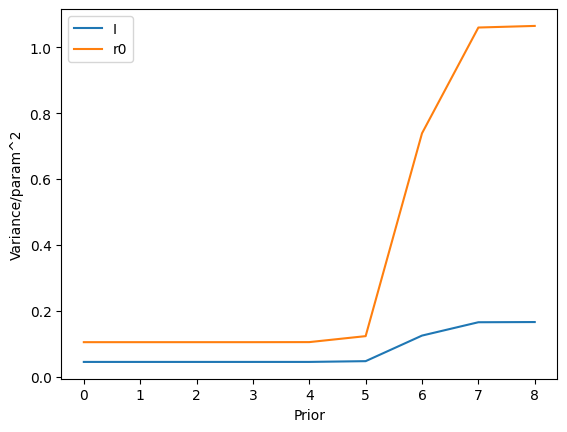

In [174]:
#plotting
x_vals = [i for i in range(len(Fs_w_prior))]
I_VarWPrior = [(np.mat(Fs_w_prior[i]).I)[0,0]/I**2 for i in x_vals]
r0_VarWPrior = [(np.mat(Fs_w_prior[i]).I)[1,1]/r0**2 for i in x_vals]

plt.plot(x_vals, I_VarWPrior, label = 'I')
plt.xlabel('Prior')
plt.ylabel('Var(I)')
plt.plot(x_vals, r0_VarWPrior, label = 'r0')
plt.xlabel('Prior')
plt.ylabel('Variance/param^2')
plt.legend()


In [149]:

(np.mat(Fs_w_prior[0]).I)[0,0]


27.97709978575917

array([0.        , 0.01354393, 0.02708786, 0.04063179, 0.05417571,
       0.06771964, 0.08126357, 0.0948075 , 0.10835143, 0.12189536,
       0.13543929, 0.14898322, 0.16252714, 0.17607107, 0.189615  ,
       0.20315893, 0.21670286, 0.23024679, 0.24379072, 0.25733464,
       0.27087857, 0.2844225 , 0.29796643, 0.31151036, 0.32505429,
       0.33859822, 0.35214214, 0.36568607, 0.37923   , 0.39277393,
       0.40631786, 0.41986179, 0.43340572, 0.44694965, 0.46049357,
       0.4740375 , 0.48758143, 0.50112536, 0.51466929, 0.52821322,
       0.54175715, 0.55530107, 0.568845  , 0.58238893, 0.59593286,
       0.60947679, 0.62302072, 0.63656465, 0.65010857, 0.6636525 ,
       0.67719643, 0.69074036, 0.70428429, 0.71782822, 0.73137215,
       0.74491608, 0.75846   , 0.77200393, 0.78554786, 0.79909179,
       0.81263572, 0.82617965, 0.83972358, 0.8532675 , 0.86681143,
       0.88035536, 0.89389929, 0.90744322, 0.92098715, 0.93453108,
       0.948075  , 0.96161893, 0.97516286, 0.98870679, 1.00225

In [166]:
sigmavals[2]**2

7.383382080915319